##  An ONNX Model

In this notebook, you'll learn how to train a model, convert it to ONNX, and then predict on data using the uploaded ONNX model.<br>
                                                                                                                             
This notebook is based on scikit-learn and uses the Boston Housing dataset.<br>
##### Overview of Dataset<br>
I took the Housing dataset which contains information about different houses in Boston.There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.<br><br>
The description of all the features is given below:<br><br>
CRIM: Per capita crime rate by town<br>
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft<br>
INDUS: Proportion of non-retail business acres per town<br>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
NOX: Nitric oxide concentration (parts per 10 million)<br>
RM: Average number of rooms per dwelling<br>
AGE: Proportion of owner-occupied units built prior to 1940.<br>
DIS: Weighted distances to five Boston employment centers.<br>
RAD: Index of accessibility to radial highways.<br>
TAX: Full-value property tax rate.<br>
PTRATIO: Pupil-teacher ratio by town.<br>
B: 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town<br>
LSTAT: Percentage of lower status of the population.<br>
MEDV: Median value of owner-occupied homes.<br><br>
The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

##### Why Use ONNX?<br><br>
Open Neural Network Exchange(ONNX) is designed to allow framework INTEROPORABILITY - Allow developers to more easily move their models between frameworks.Hardware OPTIMIZATION - Using ONNX runtimes and libraries designed to maximize performance across hardware. 

##### Loading Libraries

In [3]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import pickle

##### Loading dataset from scikit-learn datsets

In [4]:
boston = load_boston()

In [9]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


###### Trying to save indices of columns which helps in tracking the order of columns

In [11]:
features = boston['feature_names']
features


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
with open('features.pickle', 'wb') as f:  #saving features into pickle file
    pickle.dump(features,f)

In [13]:
boston.data.shape

(506, 13)

In [14]:
boston.target.shape

(506,)

In [15]:
boston.data.dtype

dtype('float64')

In [16]:
boston.target.dtype

dtype('float64')

In [17]:
x = boston.data
y = boston.target

##### Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [19]:
print('X_train:',X_train.shape,'\ny_train:',y_train.shape,'\nX_test:',X_test.shape,'\ny_test:',y_test.shape)

X_train: (354, 13) 
y_train: (354,) 
X_test: (152, 13) 
y_test: (152,)


##### Creating a Pipeline
<br>Pipeline helps to automate ML workflows which is a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()
rf = RandomForestRegressor(random_state=0)

In [22]:
pipe = Pipeline(steps=[('Scaler',sc), ('rf', rf)])

##### Grid Search

In [23]:
#n_components = [2,5,7,9,10]

params_grid = {
    'rf__n_estimators': [3,5,10],
    'rf__max_depth': [3,5,7,9]
     }

In [24]:
estimator = GridSearchCV(pipe, params_grid,cv=5, n_jobs=1, scoring= 'r2')
estimator.fit(X_train,y_train)

print('Best parameters:',estimator.best_params_, '\n\nr2:',estimator.best_score_)


Best parameters: {'rf__max_depth': 9, 'rf__n_estimators': 5} 

r2: 0.8112741738276453


In [25]:
model = estimator.best_estimator_
model.fit(X_train,y_train)
r2 = model.score(X_train,y_train)
print('r2 after parameter tuning',r2)


r2 after parameter tuning 0.9625396462971011


In [26]:
from sklearn.metrics import mean_squared_error
import math

In [27]:
pred = model.predict(X_test)
print("RMSE Test:",np.sqrt(mean_squared_error(pred,y_test)))

RMSE Test: 4.550560411344521


In [28]:
pred

array([23.99405583, 22.18555556, 21.74894444, 11.59873016, 20.90150706,
       21.21046743, 21.39536787, 20.5251341 , 20.42692342, 20.09489606,
        7.29666667, 11.2       , 14.178     ,  9.27238095, 50.        ,
       33.47066667, 20.90376715, 36.2       , 28.19738916, 20.5251341 ,
       23.97282567, 21.39577778, 19.45600717, 23.5387528 , 21.6411341 ,
       19.56      , 19.44489606, 16.78166667, 46.72      , 18.958     ,
       14.774     , 18.0754902 , 19.58165812, 20.17479222, 22.61416667,
       16.55666667,  8.50460317, 19.57222222, 15.295     , 16.744     ,
       22.89102299, 20.90150706, 22.1135468 , 16.94      , 23.34818966,
       23.05485632, 21.99066667, 16.88666667, 14.63066667, 26.625     ,
       15.29      , 20.535     , 20.47139524, 43.02      , 15.424     ,
       20.27666667, 18.90212555, 18.76405128, 20.32222222, 20.89657143,
       22.00754789, 19.57272857, 33.19066667, 30.66428571, 20.75123377,
       29.69246753, 14.94      , 17.748     , 17.1       , 20.90

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
actual_values = y_test 
plt.scatter(actual_values,pred,color='r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('RandomForest Regression Model for Test')
plt.show()

<Figure size 640x480 with 1 Axes>

##### Convert model into ONNX
<br>skl2onnx converts any machine learning pipeline into ONNX pipelines.

In [31]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_type = [('float_input', FloatTensorType([None, 13]))]
onx = convert_sklearn(model, initial_types=initial_type)



In [32]:
with open("house.onnx", "wb") as f: #save model in.onnx format
    f.write(onx.SerializeToString())

##### Load and run the model using ONNX Runtime

In [33]:
import numpy
import onnxruntime as rt
session = rt.InferenceSession("house.onnx")


In [34]:
session.get_modelmeta()

In [35]:
first_input_name = session.get_inputs()[0].name
first_output_name = session.get_outputs()[0].name

##### Predicting and evaluating results after ONNX Conversion

In [50]:
pred_onx = session.run([], {first_input_name: X_test.astype(numpy.float32)})[0]

In [51]:
pred_onx

array([[23.994055 ],
       [22.185556 ],
       [21.748943 ],
       [11.59873  ],
       [20.901506 ],
       [21.210466 ],
       [21.395369 ],
       [20.525133 ],
       [20.426924 ],
       [20.094896 ],
       [ 7.296667 ],
       [11.2      ],
       [14.1779995],
       [ 9.272381 ],
       [50.       ],
       [33.470665 ],
       [20.903767 ],
       [36.2      ],
       [28.197388 ],
       [20.525133 ],
       [23.972826 ],
       [21.395779 ],
       [19.456007 ],
       [23.538754 ],
       [21.641134 ],
       [19.56     ],
       [19.444897 ],
       [16.781666 ],
       [46.72     ],
       [18.958    ],
       [14.774    ],
       [18.07549  ],
       [19.581657 ],
       [20.174791 ],
       [22.614166 ],
       [16.556665 ],
       [ 8.504603 ],
       [19.572222 ],
       [15.295    ],
       [16.744001 ],
       [22.891022 ],
       [20.901506 ],
       [22.113546 ],
       [16.94     ],
       [23.348188 ],
       [23.054855 ],
       [21.990665 ],
       [16.88

In [38]:
onnx_rmse = math.sqrt(mean_squared_error(pred_onx,y_test))
print('ONNX RMSE:',onnx_rmse)

ONNX RMSE: 4.555614241704201


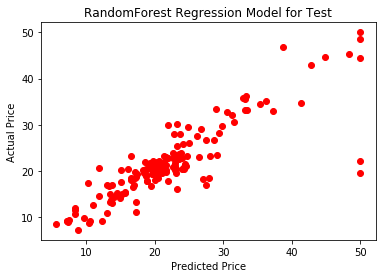

In [39]:
actual_values = y_test 
plt.scatter(actual_values,pred_onx,color='r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('RandomForest Regression Model for Test')
plt.show()

#### Conclusion<br>
Therefore ONNX model is created and prediction of houses prices before and after ONNX model is similar.

###### References<br>
https://towardsdatascience.com/onnx-made-easy-957e60d16e94<br>
https://docs.microsoft.com/en-us/azure/machine-learning/concept-onnx<br>
http://onnx.ai/sklearn-onnx/tutorial.html<br>
API:<br>
https://towardsdatascience.com/how-to-deploy-a-machine-learning-model-dc51200fe8cf
